In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
df_ibm = pd.read_csv('/content/drive/MyDrive/daily_IBM.csv')
df_ibm

,timestamp,open,high,low,close,volume
0,2022-01-28,133.19,134.5300,131.790,134.50,5471497
1,2022-01-27,133.66,134.7500,132.080,132.52,5499566
2,2022-01-26,136.47,137.0700,133.130,134.26,8335992
3,2022-01-25,129.14,137.3361,128.300,136.10,19715698
4,2022-01-24,127.99,129.1500,124.193,128.82,13777648
...,...,...,...,...,...,...
5593,1999-11-05,92.75,92.9400,90.190,90.25,13737600
5594,1999-11-04,94.44,94.4400,90.000,91.56,16697600
5595,1999-11-03,95.87,95.9400,93.500,94.37,10369100
5596,1999-11-02,96.75,96.8100,93.690,94.81,11105400


**Reverse the order of the dataframe (because of the timestamp is in reversed order)**

In [35]:
df1_ibm = df_ibm.iloc[::-1]
df1_ibm

,timestamp,open,high,low,close,volume
5597,1999-11-01,98.50,98.8100,96.370,96.75,9551800
5596,1999-11-02,96.75,96.8100,93.690,94.81,11105400
5595,1999-11-03,95.87,95.9400,93.500,94.37,10369100
5594,1999-11-04,94.44,94.4400,90.000,91.56,16697600
5593,1999-11-05,92.75,92.9400,90.190,90.25,13737600
...,...,...,...,...,...,...
4,2022-01-24,127.99,129.1500,124.193,128.82,13777648
3,2022-01-25,129.14,137.3361,128.300,136.10,19715698
2,2022-01-26,136.47,137.0700,133.130,134.26,8335992
1,2022-01-27,133.66,134.7500,132.080,132.52,5499566


In [36]:
df1_ibm.shape

(5598, 6)

In [37]:
df1_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5598 entries, 5597 to 0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5598 non-null   object 
 1   open       5598 non-null   float64
 2   high       5598 non-null   float64
 3   low        5598 non-null   float64
 4   close      5598 non-null   float64
 5   volume     5598 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 262.5+ KB


In [38]:
df1_ibm.describe()

,open,high,low,close,volume
count,5598.000000,5598.000000,5598.000000,5598.000000,5.598000e+03
mean,129.248555,130.427084,128.153167,129.305274,6.071260e+06
std,36.630756,36.686280,36.581169,36.639588,3.329571e+06
min,54.650000,56.700000,54.010000,55.070000,1.928430e+05
25%,96.812500,98.055000,96.002500,97.005000,3.848904e+06
50%,125.180000,126.509950,124.130000,125.265000,5.247700e+06
75%,154.522500,155.772500,153.540000,154.757500,7.330700e+06
max,215.380000,215.900000,214.300000,215.800000,4.120730e+07


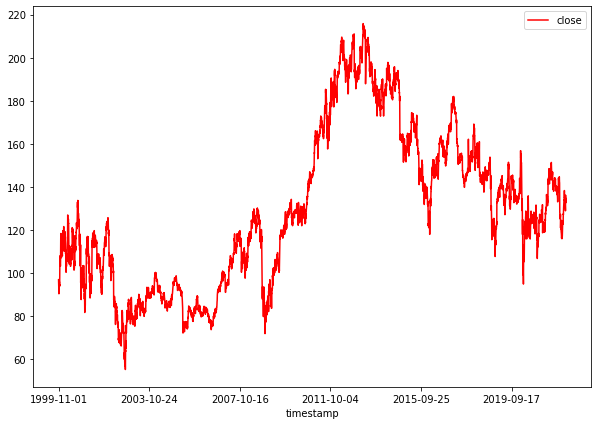

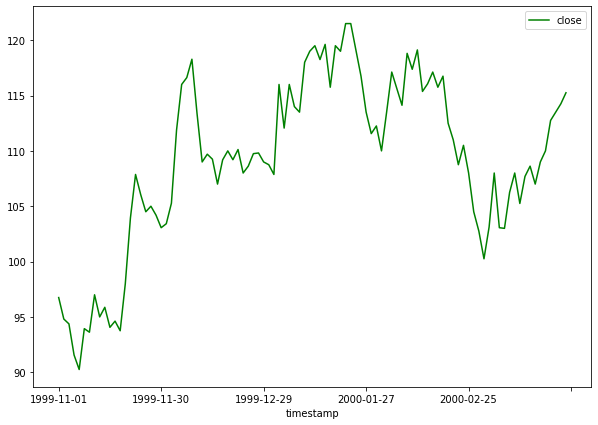

In [39]:
df1_ibm.plot('timestamp','close',color="red",figsize=(10,7))
 
# Extract only top 100 rows to make the plot a little clearer
new_data = df1_ibm.head(100)
 
#  Plotting date vs the close  market stock price
new_data.plot('timestamp','close',color="green",figsize=(10,7))
 
plt.show()

**Parse Dates:**

In [40]:
df2_ibm = pd.read_csv('/content/drive/MyDrive/daily_IBM.csv' , index_col="timestamp", parse_dates=["timestamp"])
df2_ibm

,open,high,low,close,volume
timestamp,,,,,
2022-01-28,133.19,134.5300,131.790,134.50,5471497
2022-01-27,133.66,134.7500,132.080,132.52,5499566
2022-01-26,136.47,137.0700,133.130,134.26,8335992
2022-01-25,129.14,137.3361,128.300,136.10,19715698
2022-01-24,127.99,129.1500,124.193,128.82,13777648
...,...,...,...,...,...
1999-11-05,92.75,92.9400,90.190,90.25,13737600
1999-11-04,94.44,94.4400,90.000,91.56,16697600
1999-11-03,95.87,95.9400,93.500,94.37,10369100


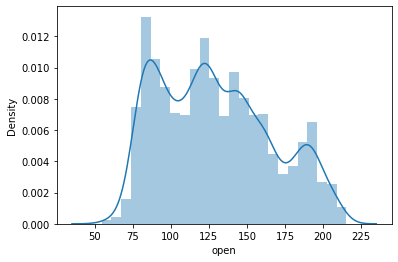

In [41]:
sns.distplot(df2_ibm.open)

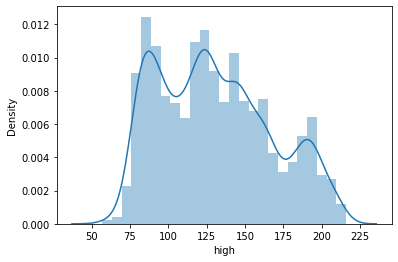

In [42]:
sns.distplot(df2_ibm.high)

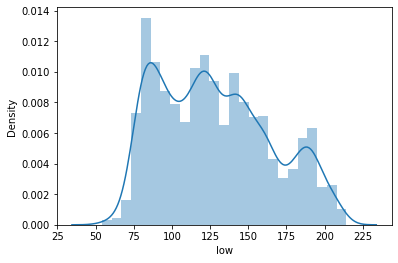

In [43]:
sns.distplot(df2_ibm.low)

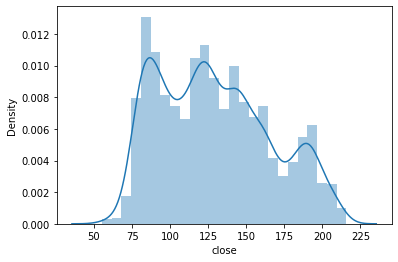

In [44]:
sns.distplot(df2_ibm.close)

In [45]:
X = df2_ibm.drop('close', axis = 1)
y = df2_ibm['close']

**Training and Testing Dataset**

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [47]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(4478, 4) (1120, 4) (4478,) (1120,)


**Modeling Part**

In [48]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)

In [49]:
pred

array([129.34945145, 187.25531399,  93.17389106, ..., 106.59083621,
       185.31623482, 146.52315701])

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    '''
        y_test: ground truth
        y_pred: model predict value
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    print('*'*50)
    print(f"*  Mean Square Error: {mse}")
    print(f"*  Root Mean Square Error: {rmse}")
    print(f"*  r2_score: {r2_scores}")
    print('*'*50)

calculate_metrics(y_test, pred)

**************************************************
*  Mean Square Error: 0.4855821529688011
*  Root Mean Square Error: 0.6968372499865382
*  r2_score: 0.9996399122185553
**************************************************


In [51]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso().fit(X_train, y_train)
model_ridge = Ridge().fit(X_train, y_train)

model_lasso_pred = model_lasso.predict(X_test)
model_ridge_pred = model_ridge.predict(X_test)

In [52]:
calculate_metrics(y_test, model_lasso_pred)

calculate_metrics(y_test, model_ridge_pred)

**************************************************
*  Mean Square Error: 1.0543505732426555
*  Root Mean Square Error: 1.0268157445436135
*  r2_score: 0.999218136917795
**************************************************
**************************************************
*  Mean Square Error: 0.48558879871121324
*  Root Mean Square Error: 0.6968420184742115
*  r2_score: 0.9996399072903457
**************************************************


In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

params_grid = GridSearchCV(SVR(), params, refit=True, verbose=3)
params_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.023 total time=   2.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.013 total time=   2.8s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.011 total time=   2.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.009 total time=   1.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.013 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.023 total time=   1.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.013 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.011 total time=   0.8s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.009 total time=   0.8s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.013 total time=   0.8s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.023 total time=   0.8s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [54]:
model_svr = SVR(C=10, gamma=0.1, kernel='rbf')
model_svr.fit(X_train, y_train)
svr_pred = model_svr.predict(X_test)

In [55]:
import joblib  

joblib.dump(model_ridge, 'modell_ibm1.pkl') 

ridge_from_joblib = model = joblib.load("modell_ibm1.pkl")

In [56]:
import joblib 
import numpy as np

def preprocess(Open, High, Low, Volume):
    test_data = [[Open, High, Low, Volume]]
    trained_model = joblib.load('/content/modell_ibm1.pkl')
    prediction = trained_model.predict(test_data)
    return prediction

In [59]:
from flask import Flask, render_template, request
import utils

app = Flask(__name__)

@app.route('/')
def main():
    return render_template('index.html')

@app.route('/predict/', methods = ['GET', 'POST'])
def predict():
    if request.method == 'POST':
        Open = request.form.get('Open')
        High = request.form.get('High')
        Low = request.form.get('Low')
        Volume = request.form.get('Volume')
    
    prediction = utils.preprocess(Open, High, Low, Volume)

    return render_template('prediction.html', prediction = prediction)



#@app.errorhandler(404)
#def error(e): 
    #return render_template('404.html')

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: ignored

In [58]:
pip install utils